<a href="https://colab.research.google.com/github/anhhaibkhn/LeetCode_Daily_Challenges/blob/master/OctLeetCodePart2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

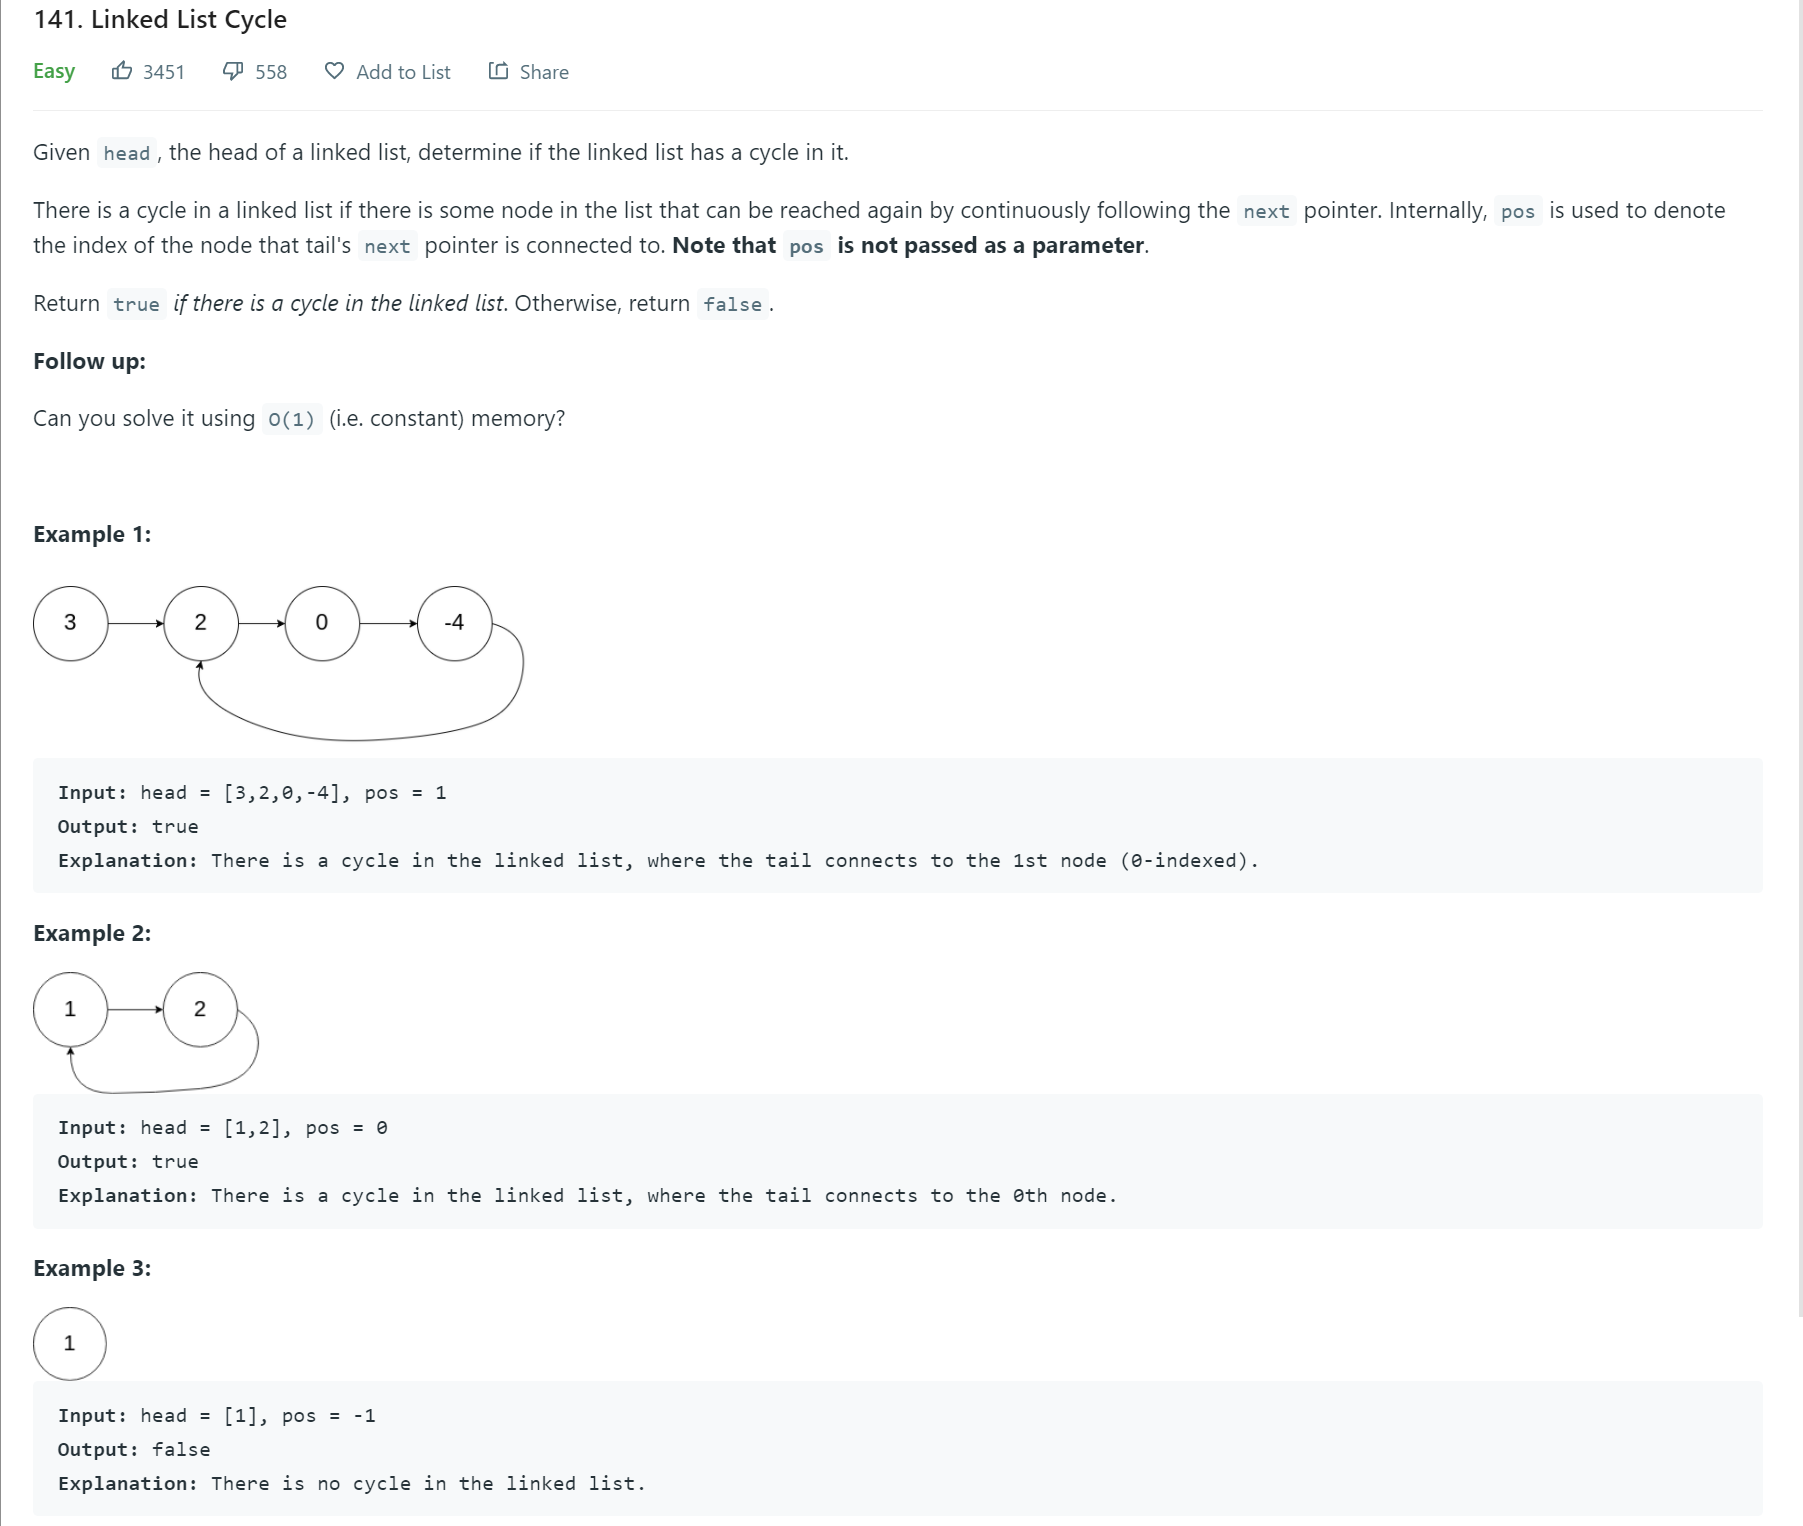

In [ ]:
# Constraints:

# The number of the nodes in the list is in the range [0, 104].
# -105 <= Node.val <= 105
# pos is -1 or a valid index in the linked-list.

''' Linked list Cycle Review 
        
        Consider the following linked list, where E is the cylce entry and X, the crossing point of fast and slow.
        H: distance from head to cycle entry E
        D: distance from E to X
        L: cycle length
                          _____
                         /     \
        head_____H______E       \
                        \       /
                         \__X__/   
        
        The slow pointer move by one node, the fast pointer moves by 2 node. if there is a circle, the fast pointer will eventually catches the slow pointer at X. 
    
'''
# Definition for singly-linked list.
# class ListNode:
#     def __init__(self, x):
#         self.val = x
#         self.next = None

class Solution:
    def hasCycle(self, head: ListNode) -> bool:
        slow, fast = head, head
        while fast and fast.next:
            slow = slow.next
            fast = fast.next.next
            if slow == fast:
                return True
        return False



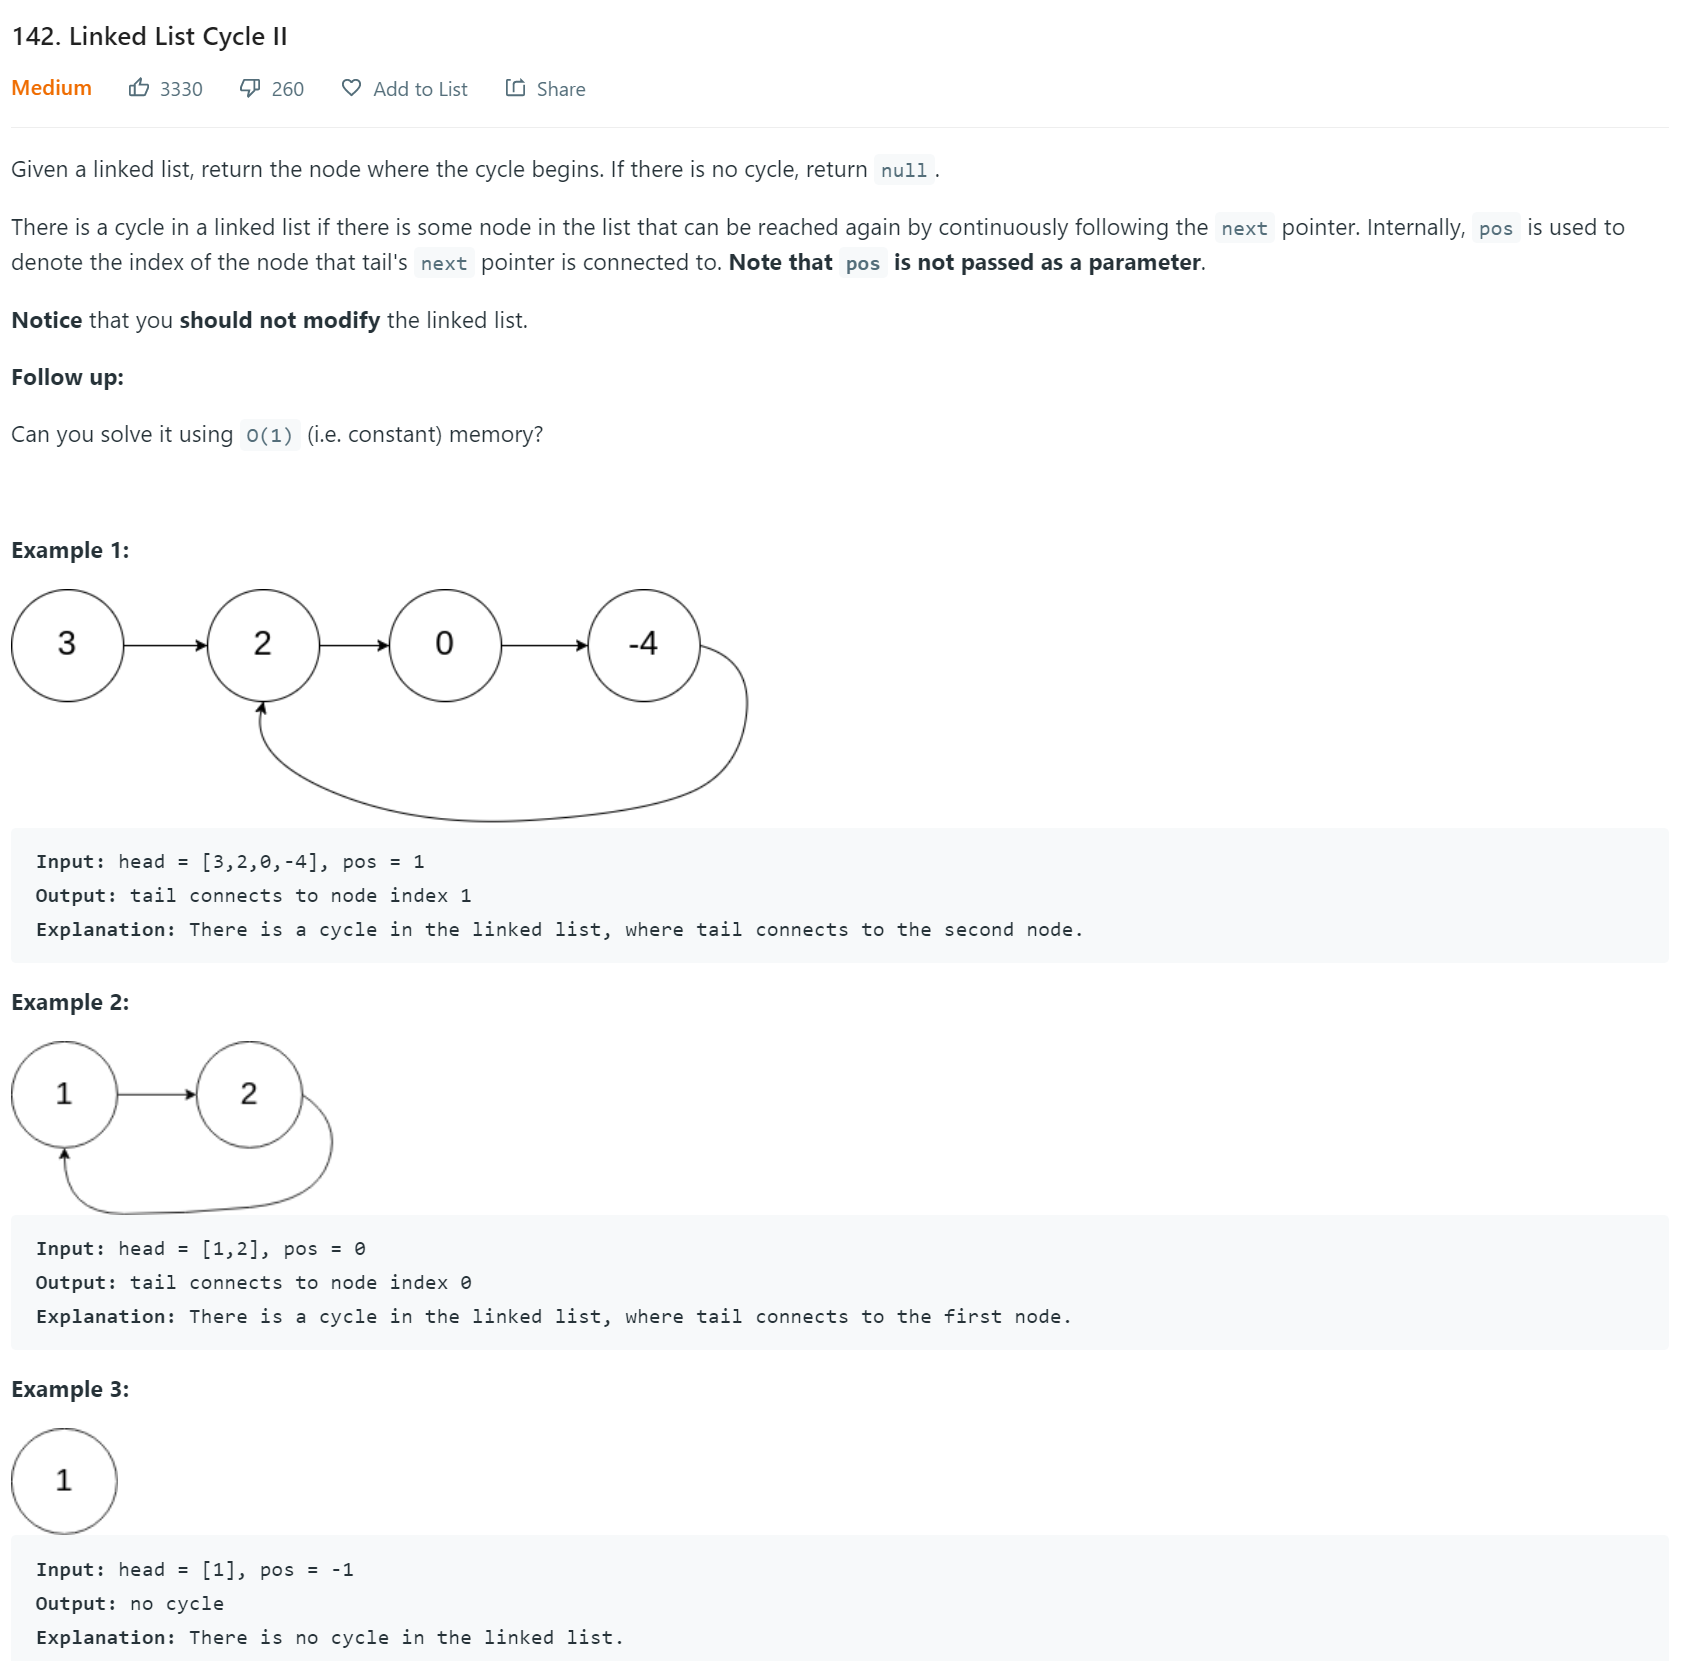

In [ ]:
# Constraints:

# The number of the nodes in the list is in the range [0, 104].
# -105 <= Node.val <= 105
# pos is -1 or a valid index in the linked-list.


''' Leetcode Challenge Oct 28th Linked List Cycle 2 
        Consider the following linked list, where E is the cylce entry and X, the crossing point of fast and slow.
        H: distance from head to cycle entry E
        D: distance from E to X
        L: cycle length
                          _____
                         /     \
        head_____H______E       \
                        \       /
                         \__X__/   
        
    
        If fast and slow both start at head, when fast catches slow, slow has traveled H+D and fast 2(H+D). 
        Assume fast has traveled n loops in the cycle, we have:
        2H + 2D = H + D + nL  -->  H + D = nL  --> H = nL - D
        Thus if two pointers start from head and X, respectively, one first reaches E, the other also reaches E. 
'''

# Definition for singly-linked list.
# class ListNode:
#     def __init__(self, x):
#         self.val = x
#         self.next = None

class Solution:
    def detectCycle(self, head: ListNode) -> ListNode:
        fast, slow = head, head
        while fast and fast.next:
            slow = slow.next
            fast = fast.next.next
            # found a cirlce, when fast catches slow
            if slow == fast:
                # go from head again 
                slow2 = head
                while slow2 != slow:
                    slow = slow.next
                    slow2 = slow2.next
                return slow2
            
        return None


In [ ]:
''' Leetcode Challenge Oct 28 Summary Range '''
# My solution 
class Solution:
    def summaryRanges(self, nums: List[int]) -> List[str]:
        my_dic = defaultdict(int)
        ret = []
        if nums:
            prev, key  = nums[0],nums[0]
            for num in nums:
                if num == prev+1:
                    my_dic[key].append(num)
                else:
                    key = num
                    my_dic[key] = [num]
                prev = num

            for key, value in my_dic.items():
                if key != value[-1]:
                    ret.append((str(key) + '->' + str(value[-1])))
                else:
                    ret.append(str(key))
                
        return ret